In [1]:
import torch

In [2]:
pip install bnlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import bnlearn as bn
import numpy as np
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

In [5]:
from google.colab import files
import io

uploaded = files.upload()

Saving cancer.bif to cancer.bif


In [6]:
uploaded

{'cancer.bif': b'network unknown {\n}\nvariable Pollution {\n  type discrete [ 2 ] { low, high };\n}\nvariable Smoker {\n  type discrete [ 2 ] { True, False };\n}\nvariable Cancer {\n  type discrete [ 2 ] { True, False };\n}\nvariable Xray {\n  type discrete [ 2 ] { positive, negative };\n}\nvariable Dyspnoea {\n  type discrete [ 2 ] { True, False };\n}\nprobability ( Pollution ) {\n  table 0.9, 0.1;\n}\nprobability ( Smoker ) {\n  table 0.3, 0.7;\n}\nprobability ( Cancer | Pollution, Smoker ) {\n  (low, True) 0.03, 0.97;\n  (high, True) 0.05, 0.95;\n  (low, False) 0.001, 0.999;\n  (high, False) 0.02, 0.98;\n}\nprobability ( Xray | Cancer ) {\n  (True) 0.9, 0.1;\n  (False) 0.2, 0.8;\n}\nprobability ( Dyspnoea | Cancer ) {\n  (True) 0.65, 0.35;\n  (False) 0.3, 0.7;\n}\n'}

In [7]:
DAG = bn.import_DAG('cancer.bif')

[bnlearn] >Import <cancer.bif>
[bnlearn] >Loading bif file <cancer.bif>
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


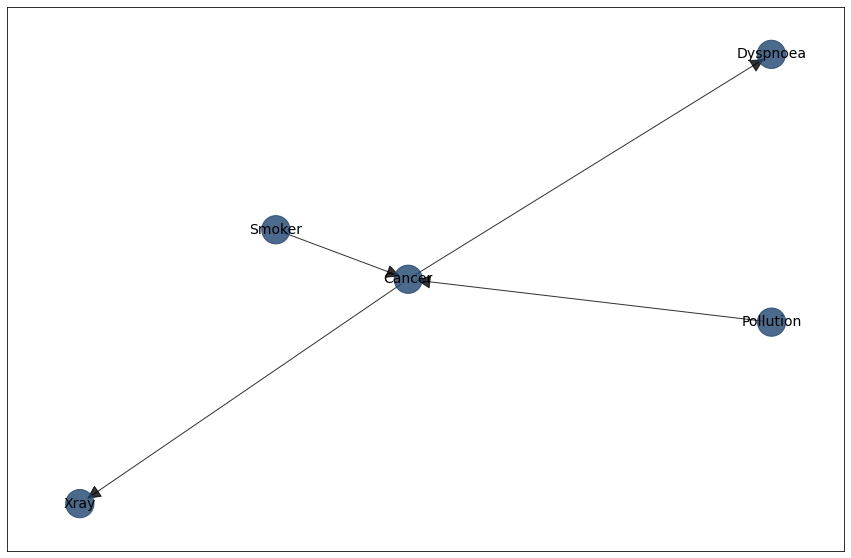

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'Pollution': array([ 0.11015064, -0.19621109]),
  'Cancer': array([-0.01887823, -0.00636704]),
  'Smoker': array([-0.06587892,  0.21294002]),
  'Xray': array([-0.13547892, -1.        ]),
  'Dyspnoea': array([0.11008543, 0.98963811])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f8c287a1160>,
 'node_properties': {'Pollution': {'node_color': '#1f456e', 'node_size': 800},
  'Cancer': {'node_color': '#1f456e', 'node_size': 800},
  'Smoker': {'node_color': '#1f456e', 'node_size': 800},
  'Xray': {'node_color': '#1f456e', 'node_size': 800},
  'Dyspnoea': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Pollution', 'Cancer'): {'color': '#000000',
   'weight': 1},
  ('Cancer', 'Xray'): {'color': '#000000', 'weight': 1},
  ('Cancer', 'Dyspnoea'): {'color': '#000000', 'weight': 1},
  ('Smoker', 'Cancer'): {'color': '#000000', 'weight': 1}}}

In [8]:
bn.plot(DAG)

In [9]:
bn.print_CPD(DAG)

[bnlearn] >Data is stored in [query.df]
+----+----------+-------------+----------+-------+
|    |   Cancer |   Pollution |   Smoker |     p |
+====+==========+=============+==========+=======+
|  0 |        0 |           0 |        0 | 0.03  |
+----+----------+-------------+----------+-------+
|  1 |        0 |           0 |        1 | 0.001 |
+----+----------+-------------+----------+-------+
|  2 |        0 |           1 |        0 | 0.05  |
+----+----------+-------------+----------+-------+
|  3 |        0 |           1 |        1 | 0.02  |
+----+----------+-------------+----------+-------+
|  4 |        1 |           0 |        0 | 0.97  |
+----+----------+-------------+----------+-------+
|  5 |        1 |           0 |        1 | 0.999 |
+----+----------+-------------+----------+-------+
|  6 |        1 |           1 |        0 | 0.95  |
+----+----------+-------------+----------+-------+
|  7 |        1 |           1 |        1 | 0.98  |
+----+----------+-------------+----------+

{'Cancer':    Cancer  Pollution  Smoker      p
 0       0          0       0  0.030
 1       0          0       1  0.001
 2       0          1       0  0.050
 3       0          1       1  0.020
 4       1          0       0  0.970
 5       1          0       1  0.999
 6       1          1       0  0.950
 7       1          1       1  0.980, 'Dyspnoea':    Dyspnoea  Cancer     p
 0         0       0  0.65
 1         0       1  0.30
 2         1       0  0.35
 3         1       1  0.70, 'Pollution':    Pollution    p
 0          0  0.9
 1          1  0.1, 'Smoker':    Smoker    p
 0       0  0.3
 1       1  0.7, 'Xray':    Xray  Cancer    p
 0     0       0  0.9
 1     0       1  0.2
 2     1       0  0.1
 3     1       1  0.8}

In [12]:
df = bn.sampling(DAG, n=10000)
df

,Pollution,Cancer,Smoker,Xray,Dyspnoea
0,0,1,1,1,1
1,0,1,1,1,1
2,0,1,1,1,1
3,0,1,0,0,0
4,0,1,1,1,1
...,...,...,...,...,...
9995,0,1,1,1,1
9996,0,1,1,1,0
9997,0,1,1,1,0
9998,0,1,1,1,0


In [ ]:
# Learn the structure using the generated data from the plotted graph
model_new = bn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [ ]:
# CPT using Parameter Learning 
model_new_w_parms = bn.parameter_learning.fit(model_new, df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+---------------------+---------------------+
| Xray      | Xray(0)             | Xray(1)             |
+-----------+---------------------+---------------------+
| Cancer(0) | 0.14153132250580047 | 0.03101972902305681 |
+-----------+---------------------+---------------------+
| Cancer(1) | 0.8584686774941995  | 0.9689802709769432  |
+-----------+---------------------+---------------------+
[bnlearn] >CPD of Pollution:
+--------------+--------------------+---------------------+
| Cancer       | Cancer(0)          | Cancer(1)           |
+--------------+--------------------+---------------------+
| Pollution(0) | 0.5550239234449761 | 0.8829653909187313  |
+--------------+--------------------+---------------------+
| Pollution(1) | 0.4449760765550239 | 0.11703

In [13]:
model_w_parms = bn.parameter_learning.fit(DAG, df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+-------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)      |
+-----------+---------------------+-----+-------------------+
| Smoker    | Smoker(0)           | ... | Smoker(1)         |
+-----------+---------------------+-----+-------------------+
| Cancer(0) | 0.06637758505670446 | ... | 0.146448087431694 |
+-----------+---------------------+-----+-------------------+
| Cancer(1) | 0.9336224149432956  | ... | 0.853551912568306 |
+-----------+---------------------+-----+-------------------+
[bnlearn] >CPD of Dyspnoea:
+-------------+---------------------+--------------------+
| Cancer      | Cancer(0)           | Cancer(1)          |
+-------------+---------------------+--------------------+
| Dyspnoea(0) | 0.528052805280528   | 0.3114296709640177 |
+-------------+---------------------+--------------------+
| Dyspnoea(1) | 0.471947194

In [ ]:
# calculating structure scores of learned model and original DAG
from bnlearn.bnlearn import structure_scores
#print(bn.structure_scores(model_new_w_parms, df, scoring_method = 'bic'))
best_score = bn.structure_scores(model_w_parms, df, scoring_method = 'bic')
print(best_score['bic'])

[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -21084.613101599207}
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
-21080.483870805798


In [14]:
""" This method incorporates grid search technique """
from sklearn.model_selection import ParameterGrid

num_runs = 10
param_grid = {
    'search_algorithm': ['hc', 'ex', 'cl'],
    'scoring_function': ['bic', 'bdeu', 'k2'],
    'methodtype' : ['bayes', 'ml']
}

# Generate all possible combinations of parameters
best_score = bn.structure_scores(model_w_parms, df, scoring_method = 'bic')
param_combinations = ParameterGrid(param_grid)
models = []
struc_scores = []

for params in param_combinations:
  # Learn the structure with the current parameters
  df = bn.sampling(DAG, n = 10000)
  model_new = bn.structure_learning.fit(df, 
                                        methodtype = params['search_algorithm'], 
                                        scoretype = params['scoring_function'] 
                                         )
  # Score the learned model
  model_new['structure_scores']
  score = bn.structure_scores(model_new, df, scoring_method="bic")
  models.append(model_new)
  struc_scores.append(score)

[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/10.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/10.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/10.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/10.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/10.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/10.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).


In [15]:
len(models)

18

In [26]:
models

[{'model': <pgmpy.base.DAG.DAG at 0x7f8b955baa30>,
  'model_edges': [('Pollution', 'Cancer'),
   ('Cancer', 'Xray'),
   ('Cancer', 'Dyspnoea'),
   ('Smoker', 'Cancer')],
  'adjmat': target     Pollution  Cancer  Smoker   Xray  Dyspnoea
  source                                               
  Pollution      False    True   False  False     False
  Cancer         False   False   False   True      True
  Smoker         False    True   False  False     False
  Xray           False   False   False  False     False
  Dyspnoea       False   False   False  False     False,
  'config': {'method': 'hc',
   'scoring': 'bic',
   'black_list': None,
   'white_list': None,
   'bw_list_method': None,
   'max_indegree': None,
   'tabu_length': 100,
   'epsilon': 0.0001,
   'max_iter': 1000000.0,
   'root_node': None,
   'class_node': None,
   'fixed_edges': set(),
   'return_all_dags': False,
   'n_jobs': -1,
   'verbose': 3},
  'structure_scores': {'k2': -23791.43625074558,
   'bds': -23802.29241795

In [25]:
models[4]

{'model': <pgmpy.base.DAG.DAG at 0x7f8b8efc6490>,
 'model_edges': [('Cancer', 'Dyspnoea'),
  ('Cancer', 'Xray'),
  ('Pollution', 'Cancer'),
  ('Smoker', 'Cancer')],
 'adjmat': target     Cancer  Dyspnoea  Pollution  Smoker   Xray
 source                                               
 Cancer      False      True      False   False   True
 Dyspnoea    False     False      False   False  False
 Pollution    True     False      False   False  False
 Smoker       True     False      False   False  False
 Xray        False     False      False   False  False,
 'config': {'method': 'ex',
  'scoring': 'bdeu',
  'black_list': None,
  'white_list': None,
  'bw_list_method': None,
  'max_indegree': None,
  'tabu_length': 100,
  'epsilon': 0.0001,
  'max_iter': 1000000.0,
  'root_node': None,
  'class_node': None,
  'fixed_edges': set(),
  'return_all_dags': False,
  'n_jobs': -1,
  'verbose': 3},
 'structure_scores': {'k2': -23624.773525416444,
  'bds': -23635.753020001895,
  'bic': -23630.45538

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


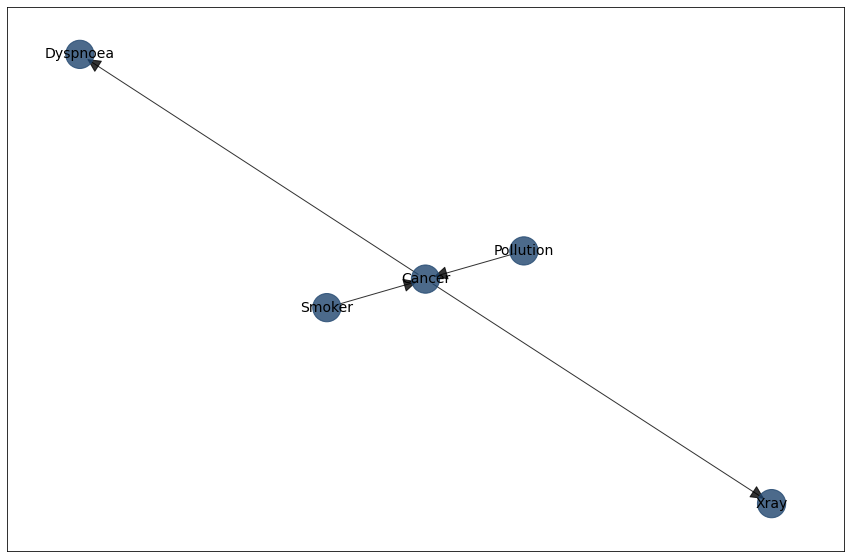

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'Cancer': array([-9.69663247e-05,  1.61490969e-04]),
  'Dyspnoea': array([-0.65105972,  1.        ]),
  'Pollution': array([0.18522889, 0.12553647]),
  'Smoker': array([-0.18582518, -0.1268568 ]),
  'Xray': array([ 0.65175297, -0.99884116])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f8b8f9d02b0>,
 'node_properties': {'Cancer': {'node_color': '#1f456e', 'node_size': 800},
  'Dyspnoea': {'node_color': '#1f456e', 'node_size': 800},
  'Pollution': {'node_color': '#1f456e', 'node_size': 800},
  'Smoker': {'node_color': '#1f456e', 'node_size': 800},
  'Xray': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Cancer', 'Dyspnoea'): {'color': '#000000', 'weight': 1},
  ('Cancer', 'Xray'): {'color': '#000000', 'weight': 1},
  ('Pollution', 'Cancer'): {'color': '#000000', 'weight': 1},
  ('Smoker', 'Cancer'): {'color': '#000000', 'weight': 1}}}

In [27]:
bn.plot(models[4])

In [20]:
# Structure score of original DAG
best_score

{'bic': -21099.77691621974}

In [19]:
#generated struc_scores
struc_scores

[{'bic': -23797.150888099422},
 {'bic': -23716.23020010915},
 {'bic': -23750.20590649744},
 {'bic': -23794.364442279264},
 {'bic': -23630.455381851727},
 {'bic': -23796.74977634293},
 {'bic': -23714.664545258587},
 {'bic': -23682.07208212088},
 {'bic': -23865.302959977773},
 {'bic': -23804.730242721453},
 {'bic': -23761.266381424968},
 {'bic': -23726.969393022184},
 {'bic': -23802.31552285393},
 {'bic': -23844.591377432876},
 {'bic': -23759.746032364455},
 {'bic': -23760.000691508292},
 {'bic': -23800.04137772612},
 {'bic': -23806.325024866703}]

Model 1:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Pollution:
+--------------+----------+
| Pollution(0) | 0.832545 |
+--------------+----------+
| Pollution(1) | 0.167455 |
+--------------+----------+
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+---------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)        |
+-----------+---------------------+-----+---------------------+
| Smoker    | Smoker(0)           | ... | Smoker(1)           |
+-----------+---------------------+-----+---------------------+
| Cancer(0) | 0.10806398955272609 | ... | 0.22410714285714287 |
+-----------+---------------------+-----+---------------------+
| Cancer(1) | 0.8919360104472739  | ... | 0.7758928571428572  |
+-----------+---------------------+-----+---------------------+
[bnlearn] >CPD of Xray:


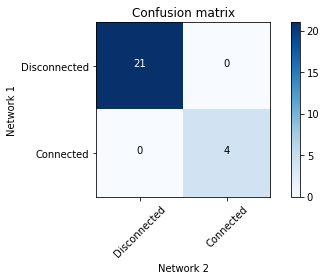

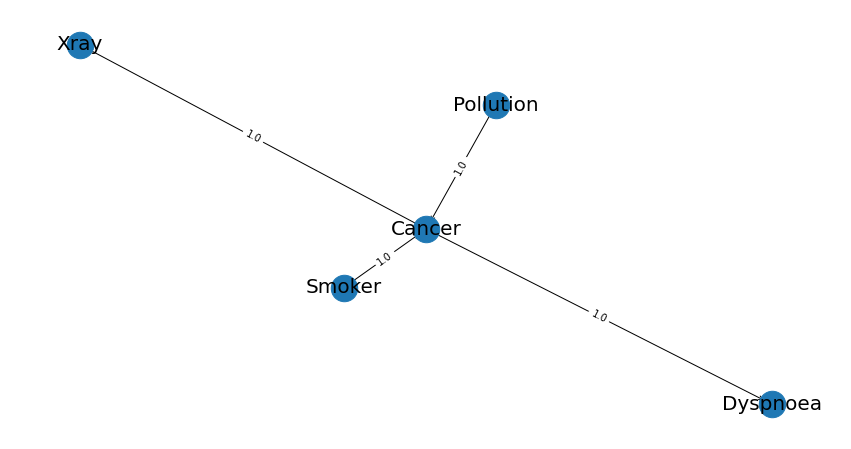

(array([[21,  0],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 2:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+---------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)        |
+-----------+---------------------+-----+---------------------+
| Smoker    | Smoker(0)           | ... | Smoker(1)           |
+-----------+---------------------+-----+---------------------+
| Cancer(0) | 0.10806398955272609 | ... 

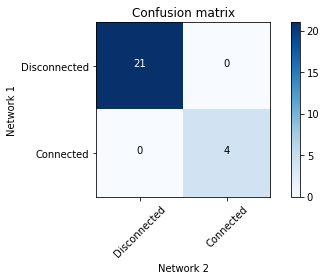

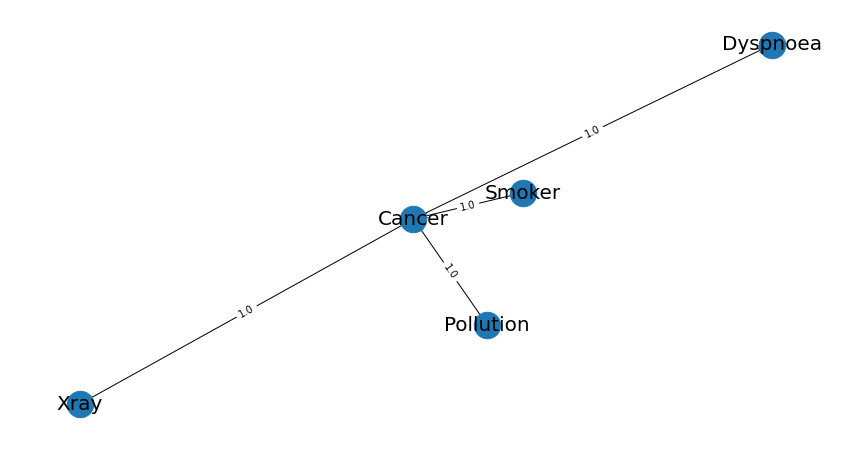

(array([[21,  0],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 3:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+-----------+
| Cancer(0) | 0.0956364 |
+-----------+-----------+
| Cancer(1) | 0.904364  |
+-----------+-----------+
[bnlearn] >CPD of Pollution:
+--------------+--------------------+---------------------+
| Cancer       | Cancer(0)          | Cancer(1)           |
+--------------+--------------------+---------------------+
| Pollution(0) | 0.52

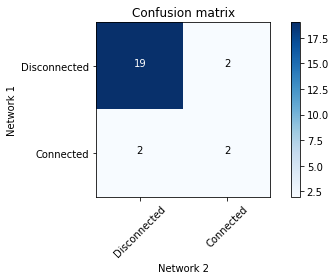

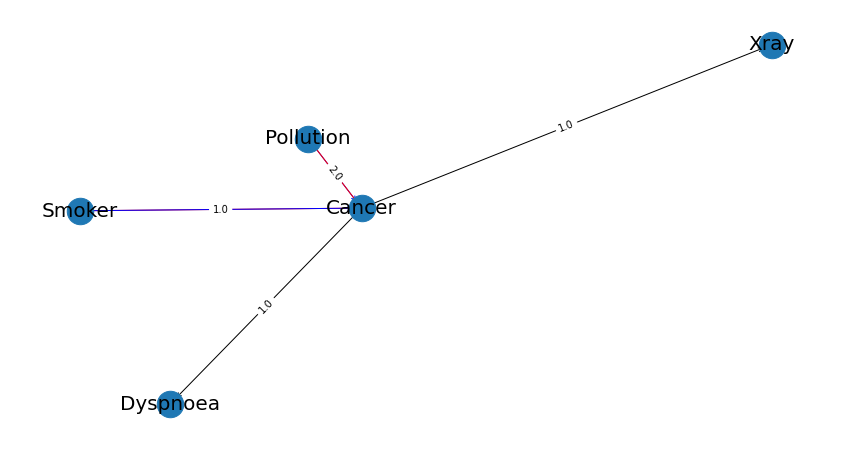

(array([[19,  2],
       [ 2,  2]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2     1         1
Smoker             0      -1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 4:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Pollution:
+--------------+----------+
| Pollution(0) | 0.832545 |
+--------------+----------+
| Pollution(1) | 0.167455 |
+--------------+----------+
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+---------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)        |
+-----------+---------------------+-----+---------------------+

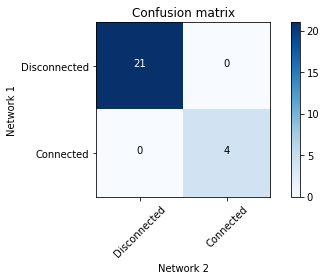

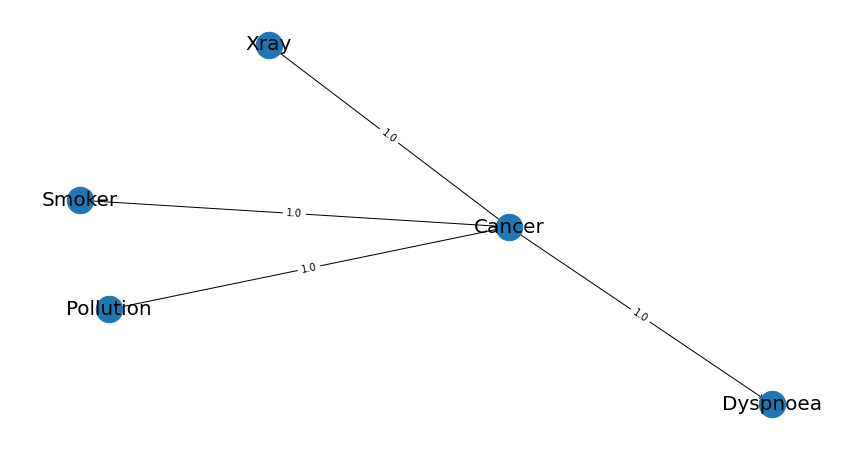

(array([[21,  0],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 5:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+---------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)        |
+-----------+---------------------+-----+---------------------+
| Smoker    | Smoker(0)           | ... | Smoker(1)           |
+-----------+---------------------+-----+---------------------+
| Cancer(0) | 0.10806398955272609 | ... 

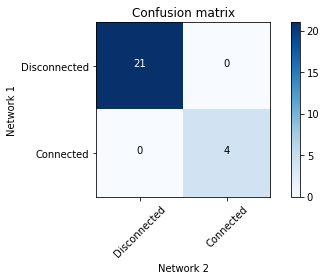

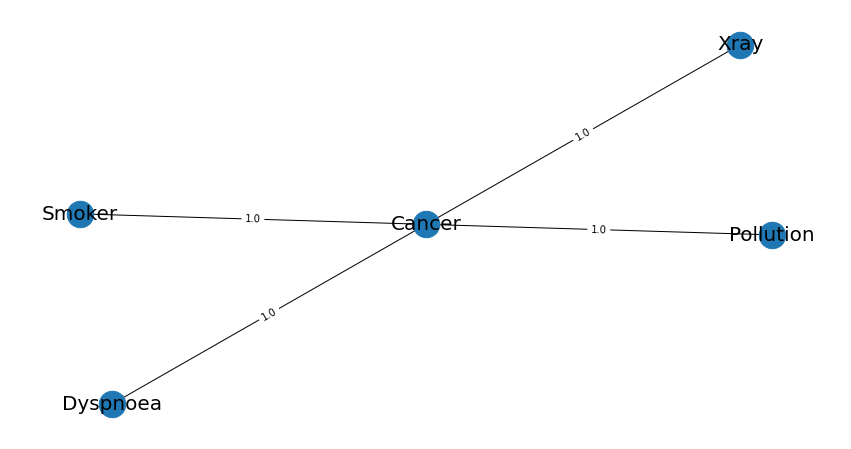

(array([[21,  0],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 6:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+-----------+
| Cancer(0) | 0.0956364 |
+-----------+-----------+
| Cancer(1) | 0.904364  |
+-----------+-----------+
[bnlearn] >CPD of Pollution:
+--------------+--------------------+---------------------+
| Cancer       | Cancer(0)          | Cancer(1)           |
+--------------+--------------------+---------------------+
| Pollution(0) | 0.52

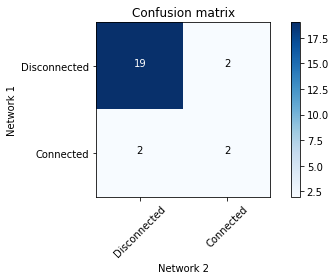

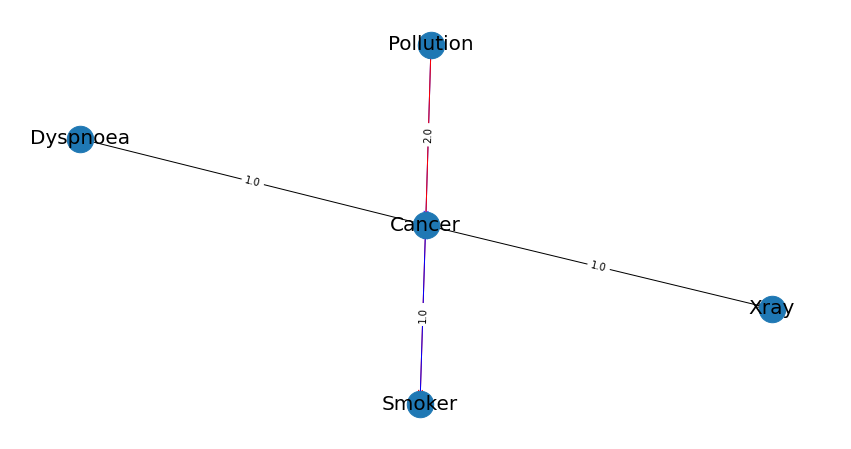

(array([[19,  2],
       [ 2,  2]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2     1         1
Smoker             0      -1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 7:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+-----------+
| Cancer(0) | 0.0956364 |
+-----------+-----------+
| Cancer(1) | 0.904364  |
+-----------+-----------+
[bnlearn] >CPD of Pollution:
+--------------+--------------------+---------------------+
| Cancer       | Cancer(0)          | Cancer(1)           |
+--------------+--------------------+---------------------+
| Pollution(0) | 0.52

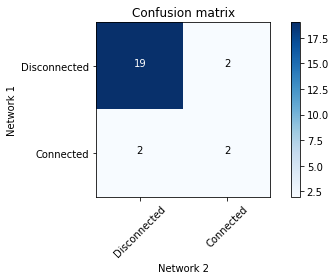

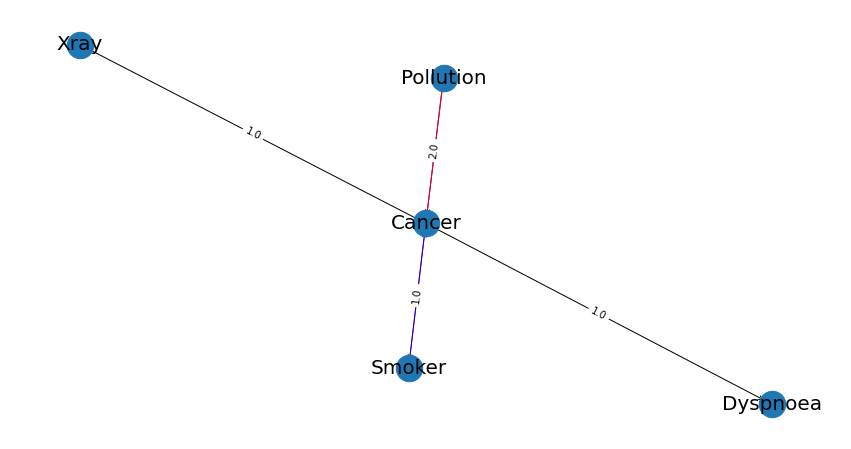

(array([[19,  2],
       [ 2,  2]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2     1         1
Smoker             0      -1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 8:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+--------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)       |
+-----------+---------------------+-----+--------------------+
| Xray      | Xray(0)             | ... | Xray(1)            |
+-----------+---------------------+-----+--------------------+
| Cancer(0) | 0.13014899211218228 | ... | 0.1

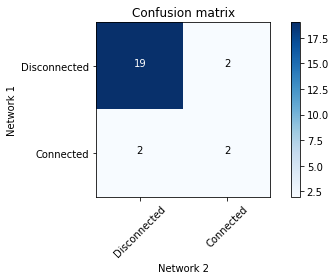

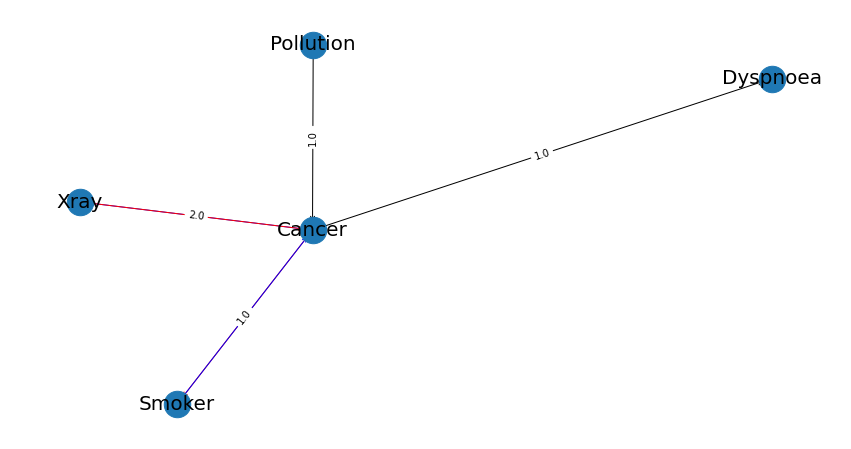

(array([[19,  2],
       [ 2,  2]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       2    -1         1
Smoker             0      -1       0     0         0
Xray               0       2       0     0         0
Dyspnoea           0       0       0     0         0)
Model 9:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+-----------+
| Cancer(0) | 0.0956364 |
+-----------+-----------+
| Cancer(1) | 0.904364  |
+-----------+-----------+
[bnlearn] >CPD of Pollution:
+--------------+--------------------+---------------------+
| Cancer       | Cancer(0)          | Cancer(1)           |
+--------------+--------------------+---------------------+
| Pollution(0) | 0.52

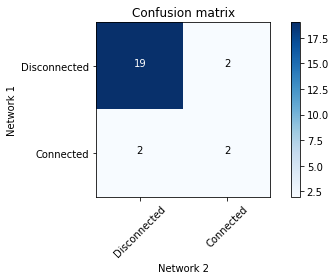

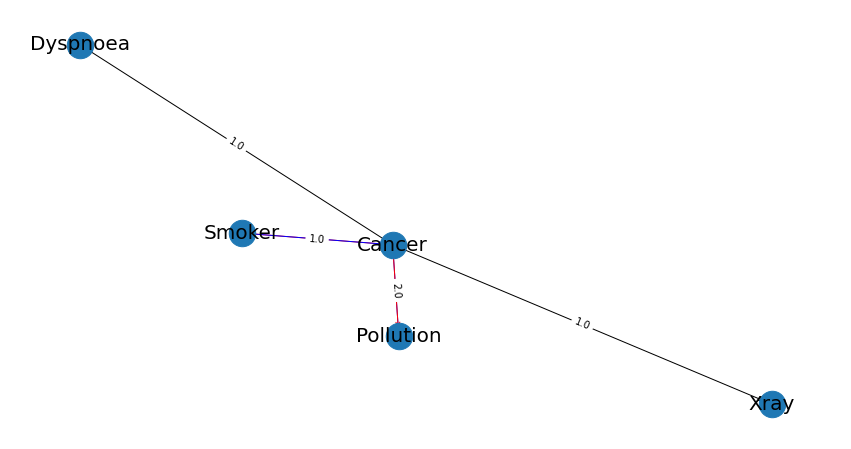

(array([[19,  2],
       [ 2,  2]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2     1         1
Smoker             0      -1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 10:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+---------------------+---------------------+
| Xray      | Xray(0)             | Xray(1)             |
+-----------+---------------------+---------------------+
| Cancer(0) | 0.19311531841652324 | 0.06065472513897468 |
+-----------+---------------------+---------------------+
| Cancer(1) | 0.8068846815834768  | 0.9393452748610254  |
+----------

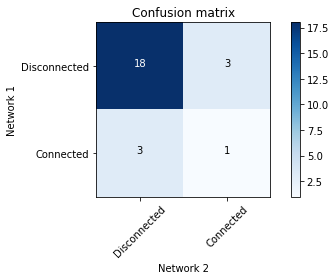

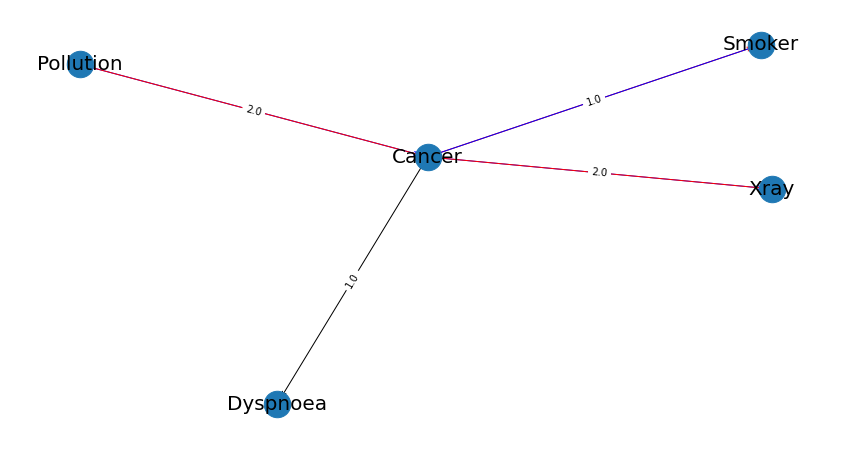

(array([[18,  3],
       [ 3,  1]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2    -1         1
Smoker             0      -1       0     0         0
Xray               0       2       0     0         0
Dyspnoea           0       0       0     0         0)
Model 11:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+---------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)        |
+-----------+---------------------+-----+---------------------+
| Smoker    | Smoker(0)           | ... | Smoker(1)           |
+-----------+---------------------+-----+---------------------+
| Cancer(0) | 0.10806398955272609 | ...

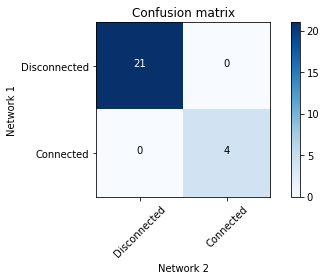

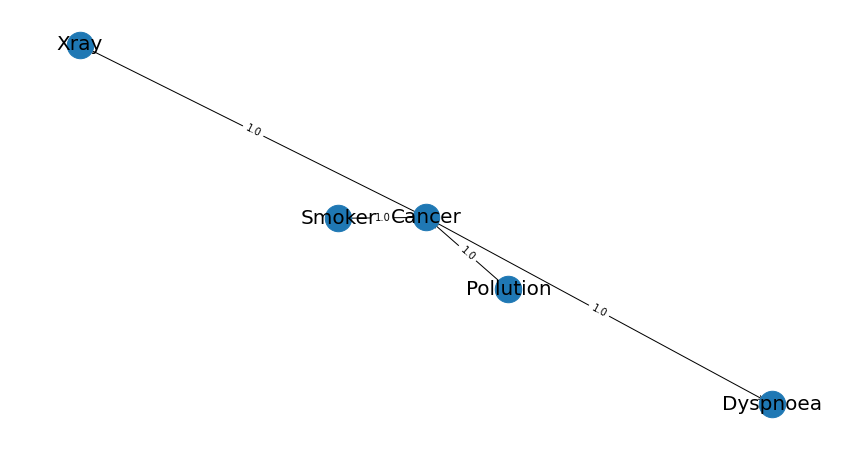

(array([[21,  0],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 12:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+-----------+
| Cancer(0) | 0.0956364 |
+-----------+-----------+
| Cancer(1) | 0.904364  |
+-----------+-----------+
[bnlearn] >CPD of Pollution:
+--------------+--------------------+---------------------+
| Cancer       | Cancer(0)          | Cancer(1)           |
+--------------+--------------------+---------------------+
| Pollution(0) | 0.5

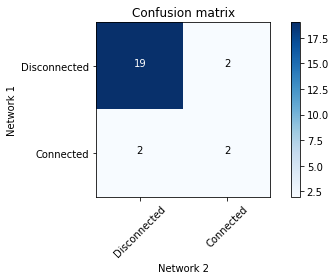

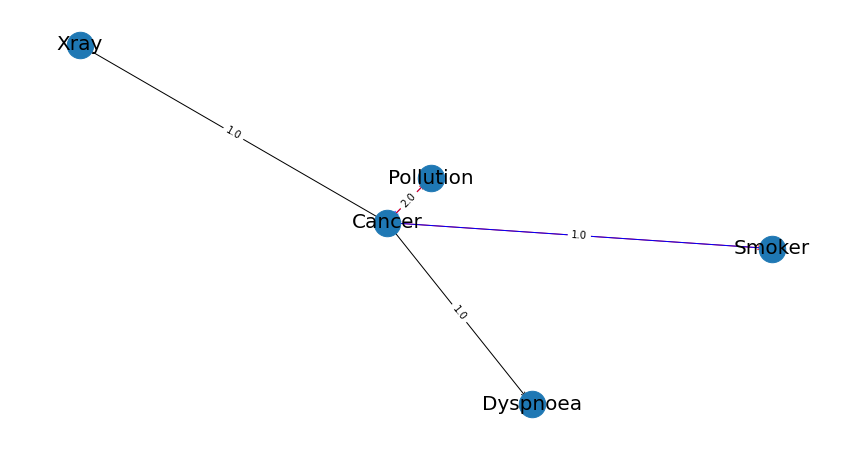

(array([[19,  2],
       [ 2,  2]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2     1         1
Smoker             0      -1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 13:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Pollution:
+--------------+----------+
| Pollution(0) | 0.832545 |
+--------------+----------+
| Pollution(1) | 0.167455 |
+--------------+----------+
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+---------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)        |
+-----------+---------------------+-----+---------------------

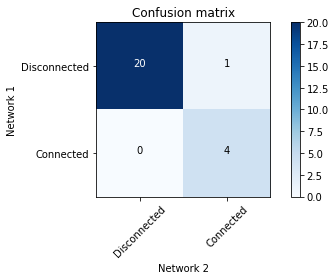

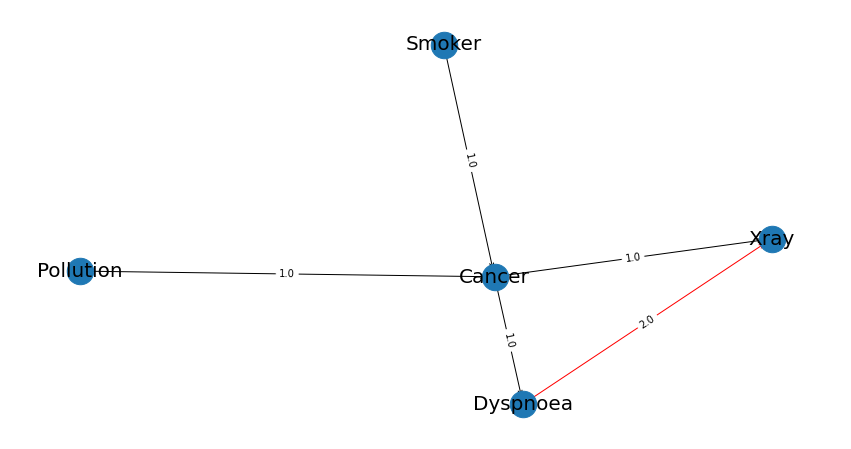

(array([[20,  1],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     2         0)
Model 14:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+---------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)        |
+-----------+---------------------+-----+---------------------+
| Smoker    | Smoker(0)           | ... | Smoker(1)           |
+-----------+---------------------+-----+---------------------+
| Cancer(0) | 0.10806398955272609 | ...

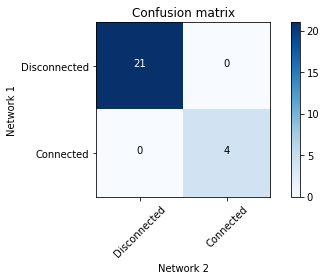

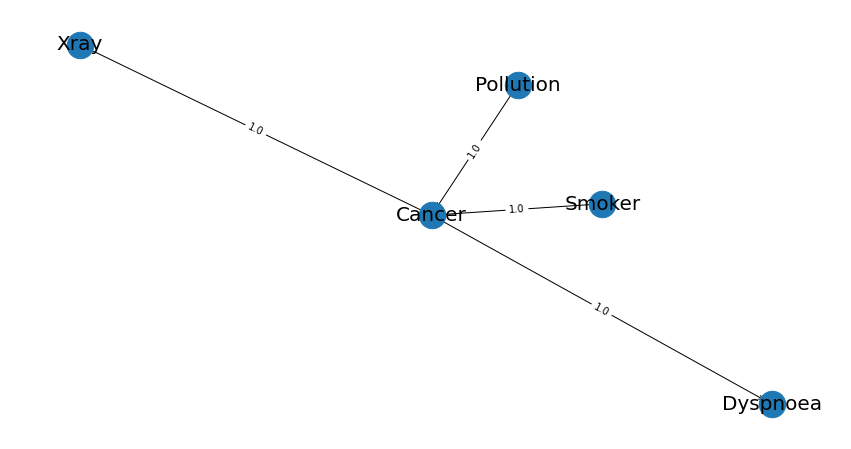

(array([[21,  0],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 15:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+-----------+
| Cancer(0) | 0.0956364 |
+-----------+-----------+
| Cancer(1) | 0.904364  |
+-----------+-----------+
[bnlearn] >CPD of Pollution:
+--------------+--------------------+---------------------+
| Cancer       | Cancer(0)          | Cancer(1)           |
+--------------+--------------------+---------------------+
| Pollution(0) | 0.5

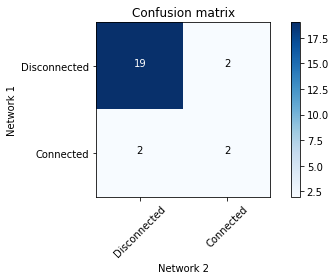

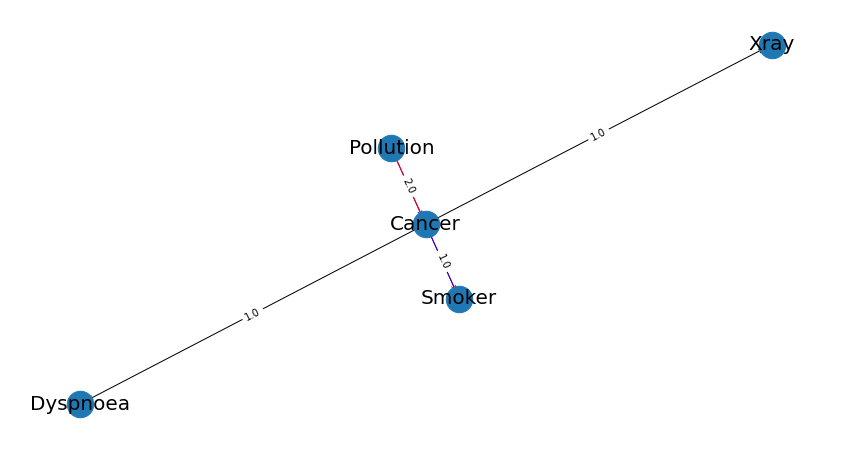

(array([[19,  2],
       [ 2,  2]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2     1         1
Smoker             0      -1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 16:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Pollution:
+--------------+--------------------+---------------------+
| Cancer       | Cancer(0)          | Cancer(1)           |
+--------------+--------------------+---------------------+
| Pollution(0) | 0.5285171102661597 | 0.8646964213912344  |
+--------------+--------------------+---------------------+
| Pollution(1) | 0.4714828897338403 | 0.1353035786087655

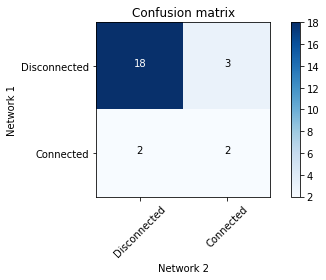

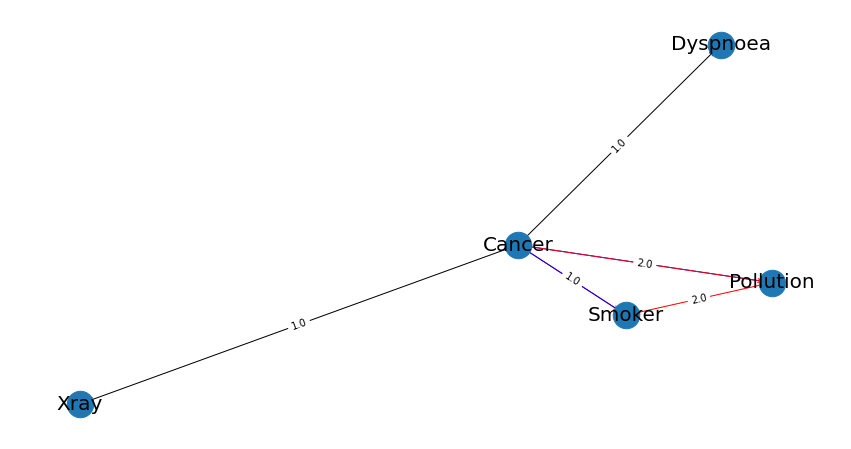

(array([[18,  3],
       [ 2,  2]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       2     0         0
Cancer             2       0       2     1         1
Smoker             0      -1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 17:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+---------------------+-----+---------------------+
| Pollution | Pollution(0)        | ... | Pollution(1)        |
+-----------+---------------------+-----+---------------------+
| Smoker    | Smoker(0)           | ... | Smoker(1)           |
+-----------+---------------------+-----+---------------------+
| Cancer(0) | 0.10806398955272609 | ...

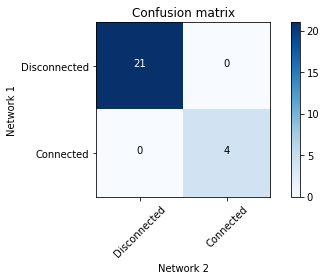

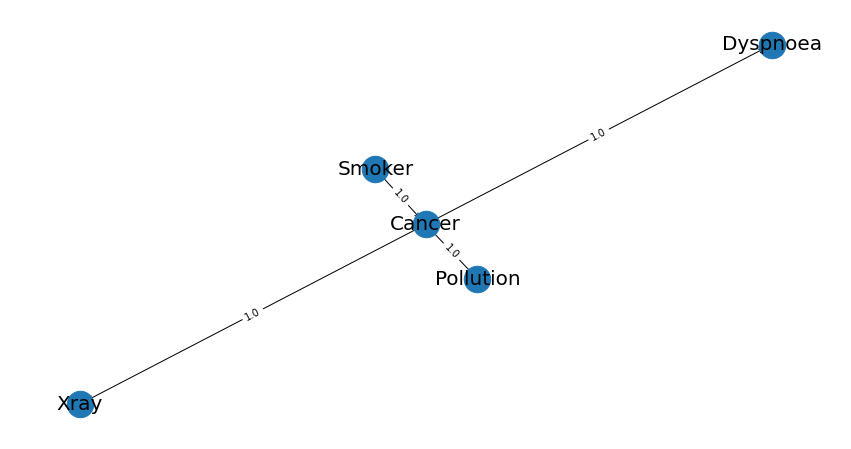

(array([[21,  0],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
Model 18:/n
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+-----------+
| Cancer(0) | 0.0956364 |
+-----------+-----------+
| Cancer(1) | 0.904364  |
+-----------+-----------+
[bnlearn] >CPD of Pollution:
+--------------+--------------------+---------------------+
| Cancer       | Cancer(0)          | Cancer(1)           |
+--------------+--------------------+---------------------+
| Pollution(0) | 0.5

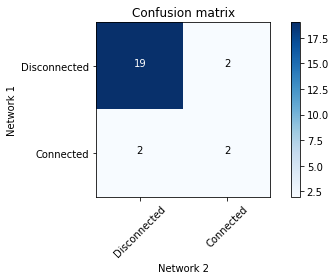

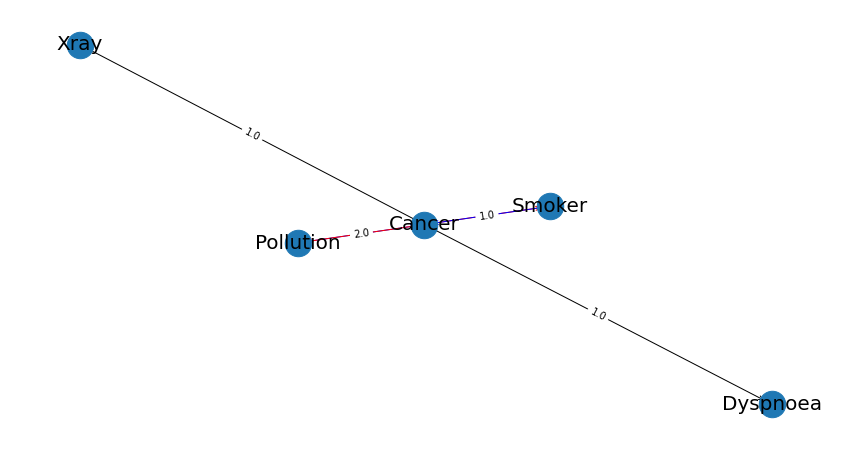

(array([[19,  2],
       [ 2,  2]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2     1         1
Smoker             0      -1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)


In [21]:
parm_struc_scores = []
for i, m in enumerate(models):
    print(f"Model {i+1}:/n")
    model_new_with_parms = bn.parameter_learning.fit(m, df)
    score_p = bn.structure_scores(model_new_with_parms, df, scoring_method="bic")
    parm_struc_scores.append(score_p)
    print(bn.compare_networks(model_w_parms, model_new_with_parms))

In [22]:
parm_struc_scores

[{'bic': -23802.911931908267},
 {'bic': -23802.911931908264},
 {'bic': -23806.325024866703},
 {'bic': -23802.911931908267},
 {'bic': -23802.911931908264},
 {'bic': -23806.325024866703},
 {'bic': -23806.325024866703},
 {'bic': -23816.473740006637},
 {'bic': -23806.325024866703},
 {'bic': -23806.325024866703},
 {'bic': -23802.911931908264},
 {'bic': -23806.325024866703},
 {'bic': -23811.864880619964},
 {'bic': -23802.911931908264},
 {'bic': -23806.325024866703},
 {'bic': -23805.6420640228},
 {'bic': -23802.911931908264},
 {'bic': -23806.325024866703}]

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cancer:
+-----------+---------------------+---------------------+
| Xray      | Xray(0)             | Xray(1)             |
+-----------+---------------------+---------------------+
| Cancer(0) | 0.19295184926727146 | 0.06036390459798377 |
+-----------+---------------------+---------------------+
| Cancer(1) | 0.8070481507327285  | 0.9396360954020162  |
+-----------+---------------------+---------------------+
[bnlearn] >CPD of Pollution:
+--------------+--------------------+--------------------+
| Cancer       | Cancer(0)          | Cancer(1)          |
+--------------+--------------------+------

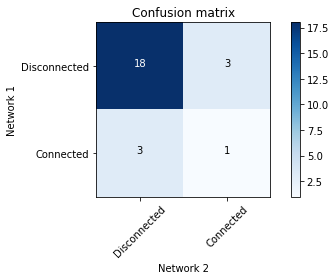

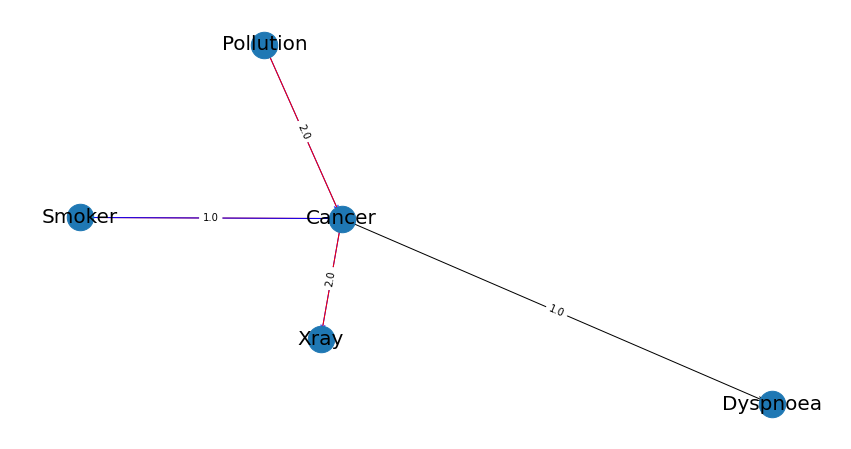

(array([[18,  3],
       [ 3,  1]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2    -1         1
Smoker             0      -1       0     0         0
Xray               0       2       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23806.325024866703}
Model 2:



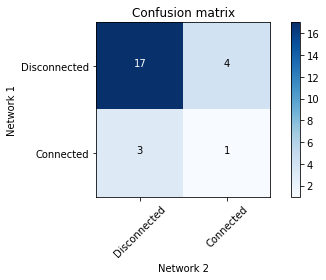

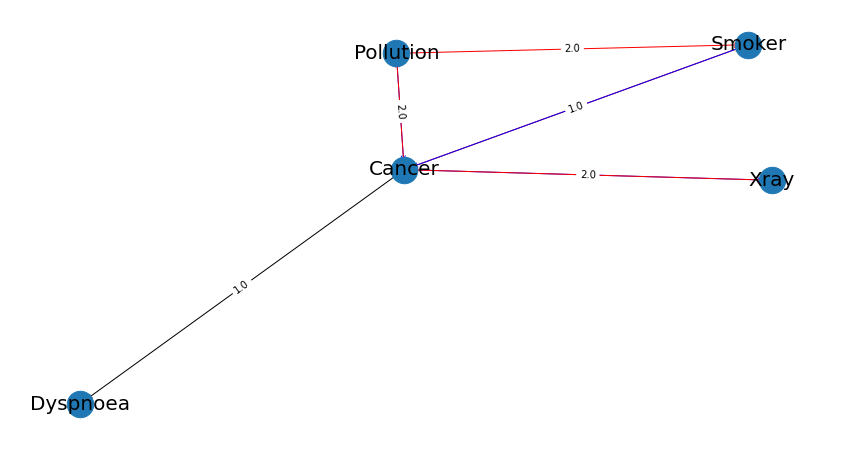

(array([[17,  4],
       [ 3,  1]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       2     0         0
Cancer             2       0       2    -1         1
Smoker             0      -1       0     0         0
Xray               0       2       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23805.6420640228}
Model 3:



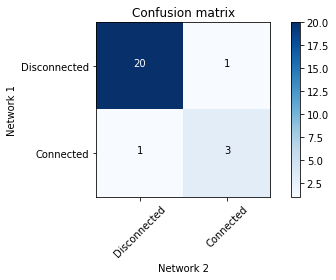

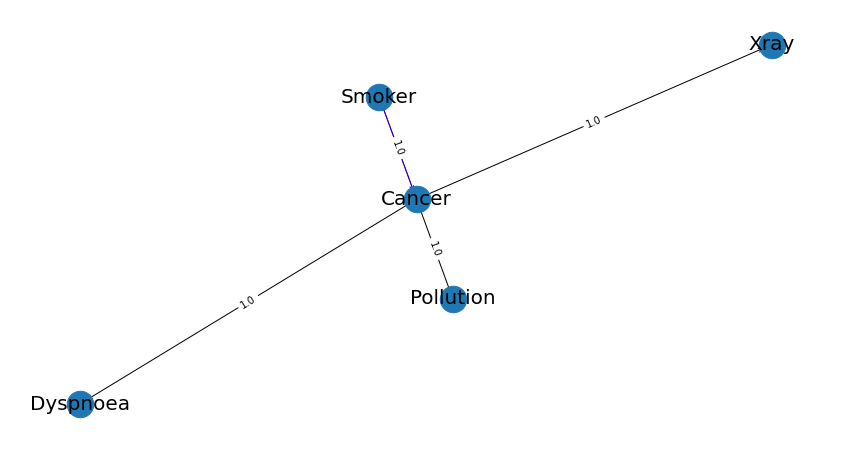

(array([[20,  1],
       [ 1,  3]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       2     1         1
Smoker             0      -1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23806.325024866703}
Model 4:



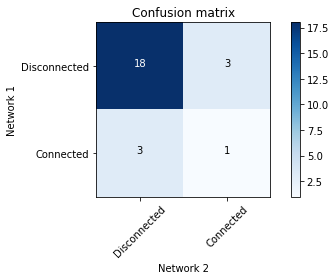

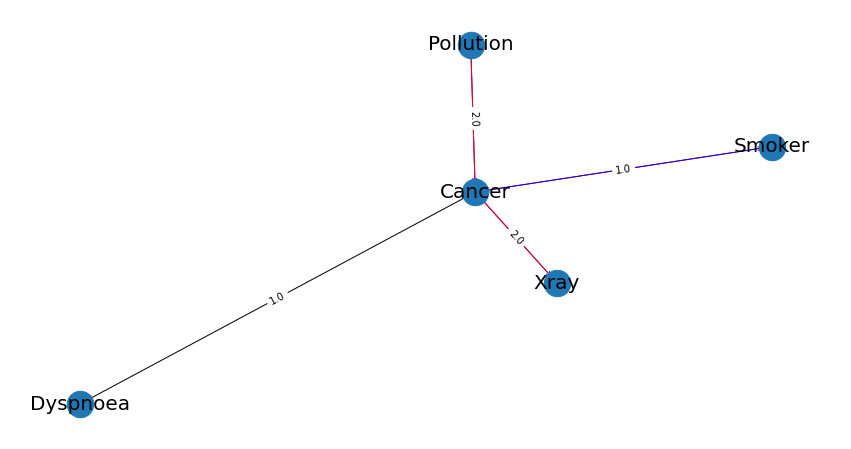

(array([[18,  3],
       [ 3,  1]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2    -1         1
Smoker             0      -1       0     0         0
Xray               0       2       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23806.325024866703}
Model 5:



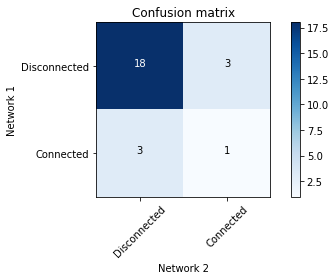

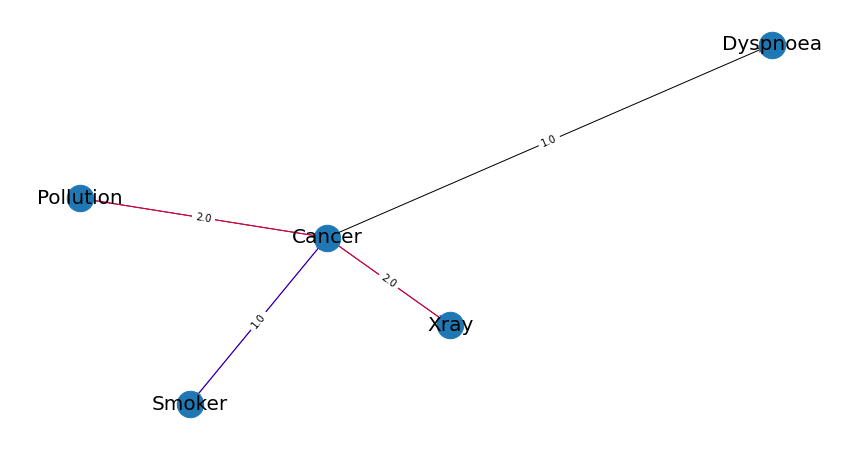

(array([[18,  3],
       [ 3,  1]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2    -1         1
Smoker             0      -1       0     0         0
Xray               0       2       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23806.325024866703}
Model 6:



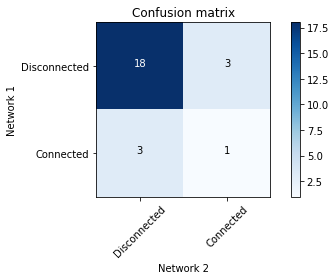

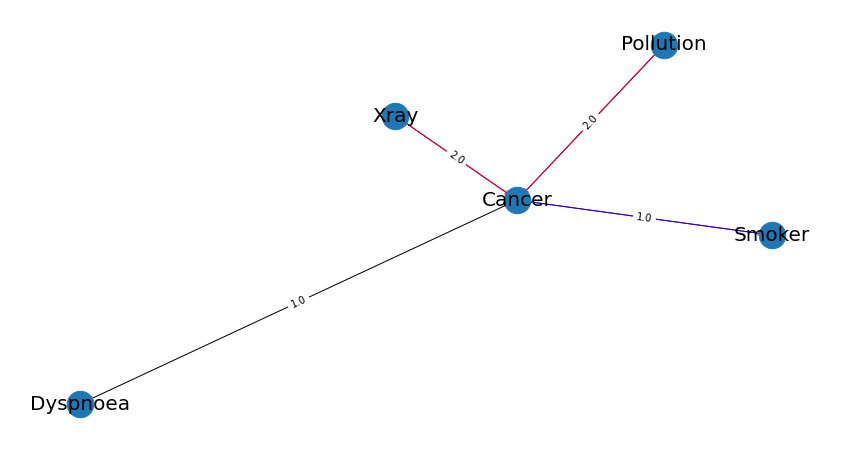

(array([[18,  3],
       [ 3,  1]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2    -1         1
Smoker             0      -1       0     0         0
Xray               0       2       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23806.325024866703}
Model 7:



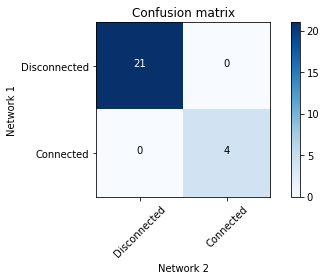

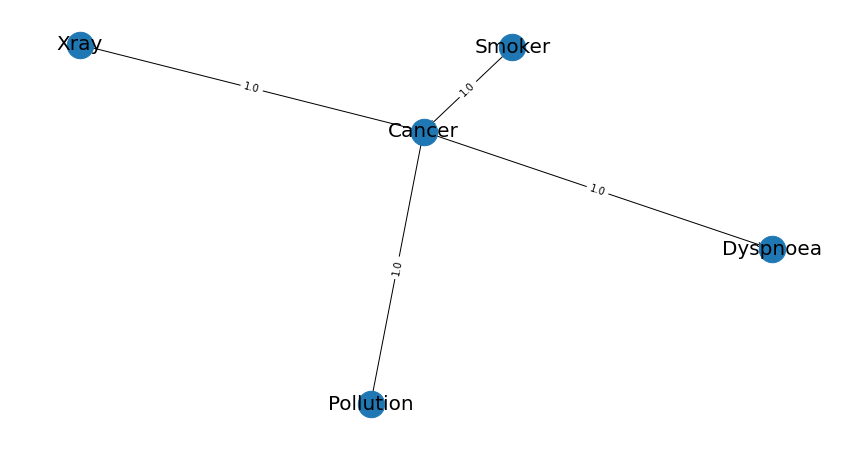

(array([[21,  0],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23802.911931908267}
Model 8:



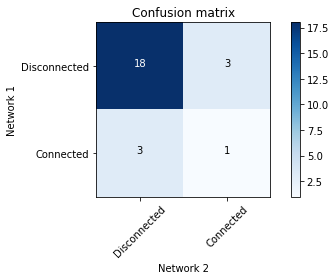

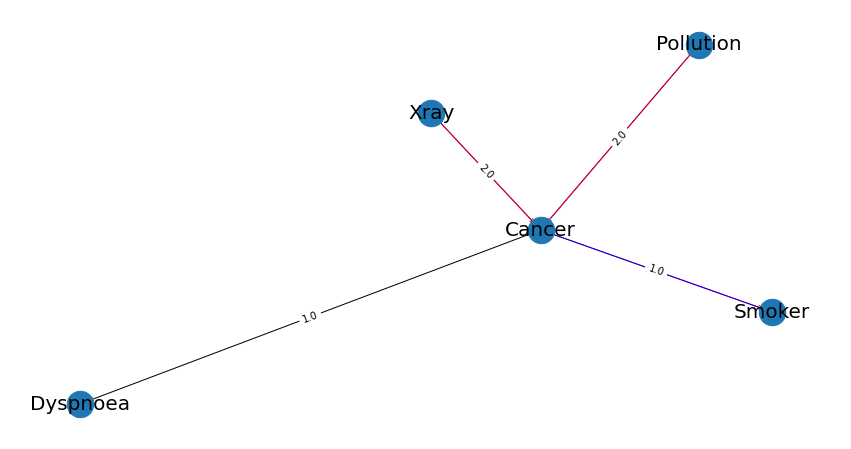

(array([[18,  3],
       [ 3,  1]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       0     0         0
Cancer             2       0       2    -1         1
Smoker             0      -1       0     0         0
Xray               0       2       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23806.325024866703}
Model 9:



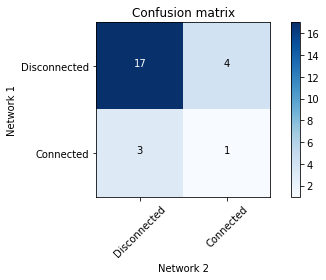

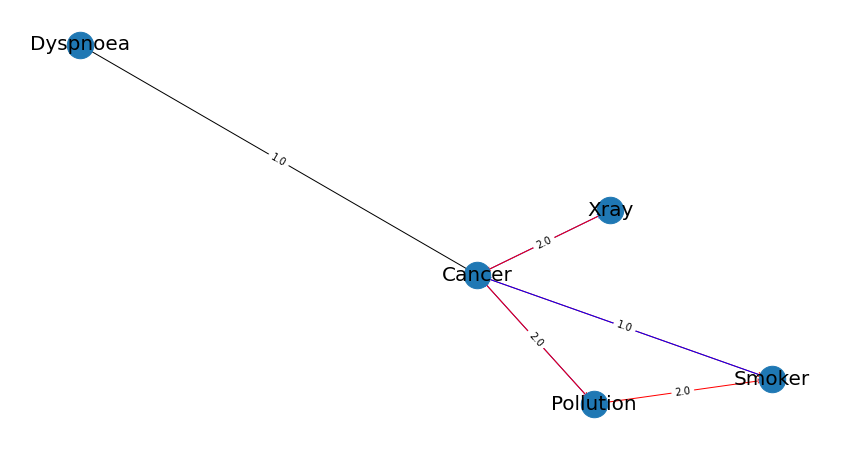

(array([[17,  4],
       [ 3,  1]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0      -1       2     0         0
Cancer             2       0       2    -1         1
Smoker             0      -1       0     0         0
Xray               0       2       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23805.6420640228}
Model 10:



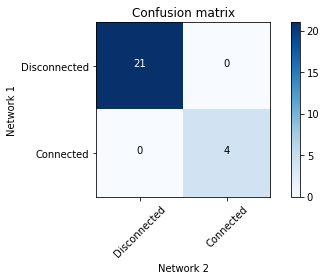

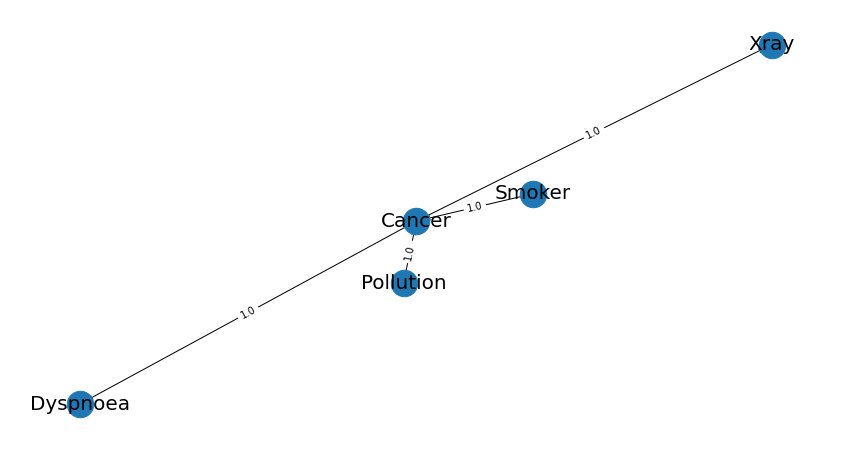

(array([[21,  0],
       [ 0,  4]]), target     Pollution  Cancer  Smoker  Xray  Dyspnoea
source                                              
Pollution          0       1       0     0         0
Cancer             0       0       0     1         1
Smoker             0       1       0     0         0
Xray               0       0       0     0         0
Dyspnoea           0       0       0     0         0)
[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).
{'bic': -23802.911931908267}


In [28]:
"""No hyperparameter tuning involved here, sampling and recreating the network 
   with the optimal structural parameter space ('hc' and ''bic') and learning the 
   probability distributions using ('bayes') method.
"""
iterations = 10
models_gen = []

for i in range(iterations):
    df1 = bn.sampling(DAG, n=10000)
    model_new = bn.structure_learning.fit(df1)
    model_new_w_parms = bn.parameter_learning.fit(model_new, df1)
    models_gen.append(model_new_w_parms)

for i, m in enumerate(models_gen):
    print(f"Model {i+1}:\n")
    print(bn.compare_networks(model_w_parms, m))
    print(bn.structure_scores(m, df, scoring_method = 'bic'))